# Problema da Mochila Binária

O problema da mochila (em inglês, Knapsack problem) é um problema de **otimização combinatória**. O nome dá-se devido ao modelo de uma situação em que é necessário preencher uma mochila com objetos de diferentes _pesos_ e _valores_. O objetivo é que se preencha a mochila com o maior valor possível, não ultrapassando o peso máximo suportado pela mochila.

<img src='imagens/knapsack.png' width='300'>

O problema da mochila é um dos 21 problemas NP-completos de Richard Karp, exposto em 1972. A formulação do problema é extremamente simples, porém sua solução é mais complexa. Este problema é a base do primeiro algoritmo de chave pública (chaves assimétricas).

Normalmente este problema é resolvido com programação dinâmica, obtendo então a resolução exata do problema, mas também sendo possível usar PSE (procedimento de separação e evolução). Existem também outras técnicas, como usar algoritmo guloso, meta-heurística (**algoritmos genéticos**) para soluções aproximadas. 

Aqui, utilizaremos um algoritmo genético simples para tentar resolver o problema.

# 0. Importação das funções

Todas as funções necessárias para o funcionamento do algoritmo são importadas abaixo. Suas implementações se encontram no repositório.

In [1]:
# -*- coding: utf-8 -*-
"""
Source developed in Python 3.7
Zaqueu Cavalcante (zaqueudovale@gmail.com) 
Date: 14/03/2020
"""

from gera_populacao_inicial import gera_populacao_inicial
from calcula_valores_populacao import calcula_valores_populacao
from calcula_pesos_populacao import calcula_pesos_populacao
from plot_espaco_busca import plot_espaco_busca
from funcao_objetivo import funcao_objetivo
from plot_funcao_objetivo import plot_funcao_objetivo
from gera_ranking import gera_ranking
from seleciona_pais import seleciona_pais
from cruzamento import cruzamento
from seleciona_mutantes import seleciona_mutantes
from realiza_mutacao import realiza_mutacao
from decodifica_mochila import decodifica_mochila
from print_lista import print_lista

# 1 - Representação de cada indivíduo/mochila

Primeiramente, definimos uma lista de objetos que podem ser adicionados à mochila, cada qual com determinado valor e peso.

Cada lista [nome, valor, peso] representa um objeto. O valor está em R$ e o peso em kg.

Você pode adiconar mais objetos ou alterar os já existentes, para ver como o programa se comporta.

In [8]:
objetos = [['Caneta', 1.5, 0.1], 
           ['Mouse', 50, 0.2], 
           ['Caderno', 60, 1.0], 
           ['Carregador', 100, 0.5], 
           ['Post-it', 5, 0.1], 
           ['Livro', 120, 0.6], 
           ['Notebook', 110, 3.0], 
           ['Smartphone', 90, 0.4], 
           ['Garrafa', 30, 1.5], 
           ['Pen-drive', 80, 0.05], 
           ['Calculadora', 120, 0.5],
           ['Pasta', 25, 0.8]]

A seguir, montamos três vetores, contendo os nomes, valores e pesos dos objetos definidos.

Além disso, calculamos o valor e peso máximo que uma mochila que contivesse todos os objetos teria. 

In [9]:
n_objetos = len(objetos)
nomes, valores, pesos  = [], [], []

for i in range(0, n_objetos):
    nomes.append(objetos[i][0])   
    valores.append(objetos[i][1]) 
    pesos.append(objetos[i][2])  

valor_max = sum(valores)    # Valor máximo (mochila com todos os objetos).
peso_max = sum(pesos)    # Peso máximo (mochila com todos os objetos).

Por fim, definimos que cada indivíduo será representado através de uma lista, na qual:
- 0 indica que o objeto não está presente na mochila.
- 1 indica que o objeto está presente na mochila.

Exemplo de mochila, na qual apenas o primeiro e o penúltimo objetos estão presentes:
    
    m = [1,0,0,0,0,0,0,0,1,0]

# 2 - Geração da população inicial

Aqui, iniciaremos a população de forma aleatória. 

In [10]:
tamanho_populacao = 200
peso_limite = 6.5    # Peso limite de uma mochila válida.

populacao = gera_populacao_inicial(tamanho_populacao, n_objetos)

# 3 - Ciclo evolutivo

Nessa etapa, todos os indivíduos da população serão avaliados em relação à sua **aptidão** de resolver o problema, se **reproduzirão** e sofrerão eventuais **mutações** para formar uma prole que **herde** as características das mochilas mais aptadas.

Desta forma, se pretende que as populações apresentem mochilas cada vez melhores ao passar das gerações, convergindo para as melhores soluções ao final.

In [11]:
n_geracoes = 10    # Número máximo de gerações (critério de parada).

prob_mutacao = 10    # Probabilidade de ocorrer mutação, em %.
taxa_mutacao = 5    # Quantidade de genes que sofrerão mutação, em %.

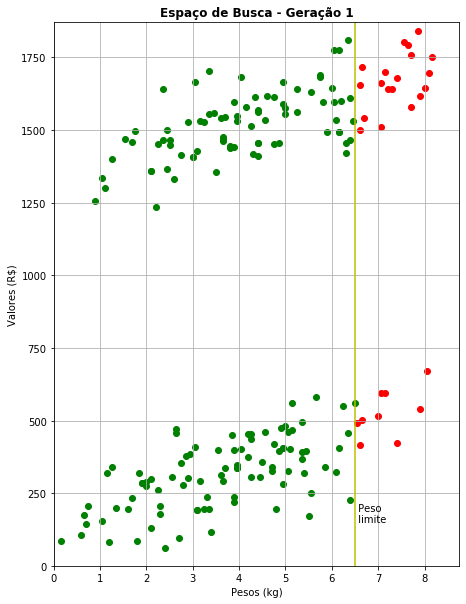

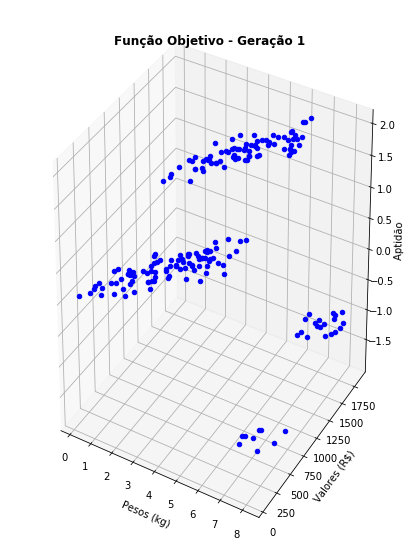

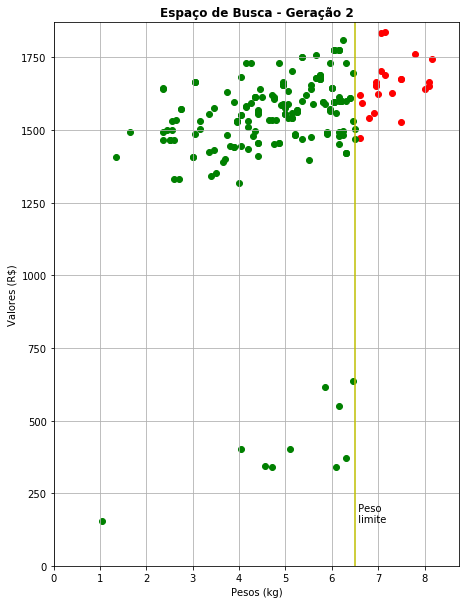

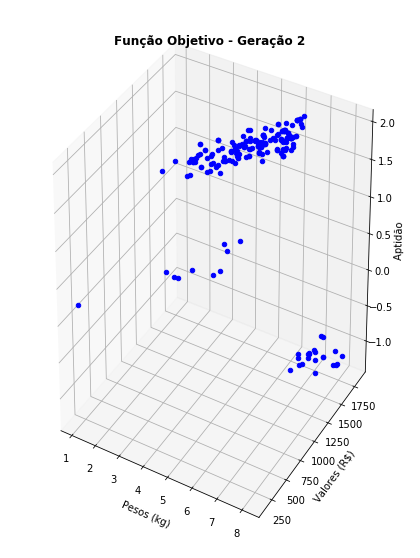

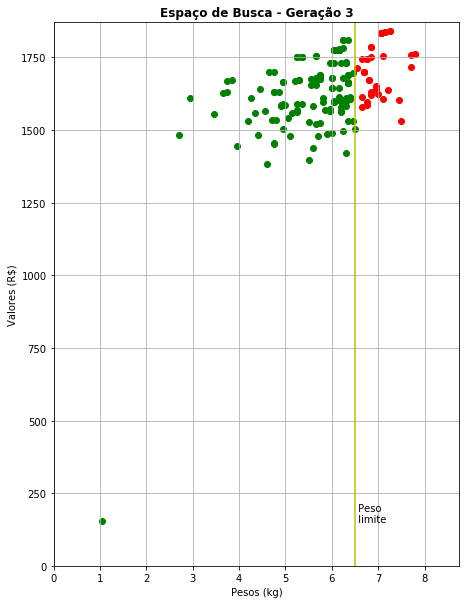

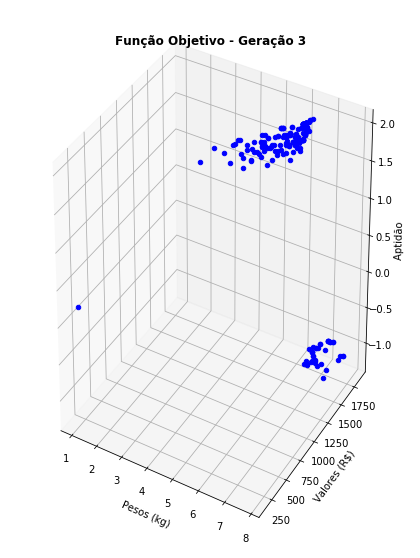

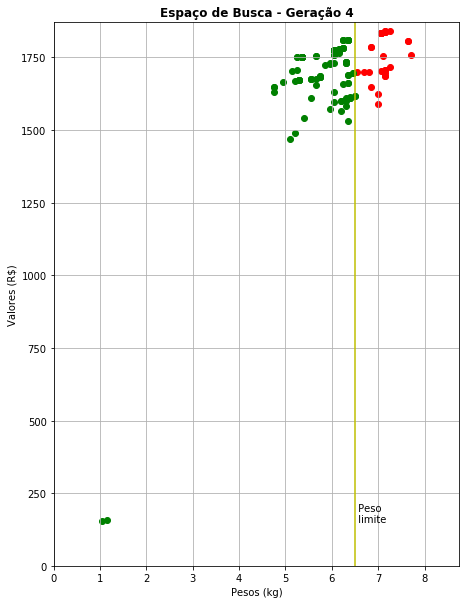

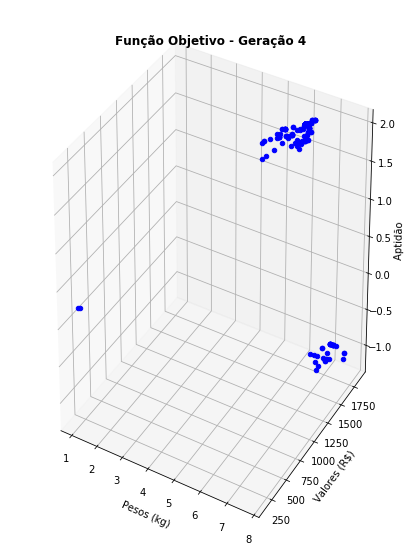

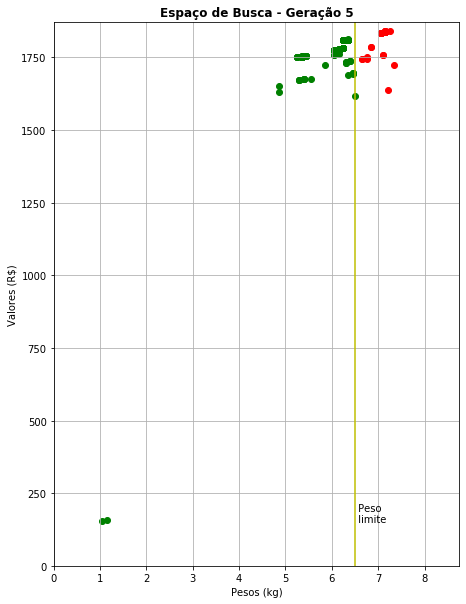

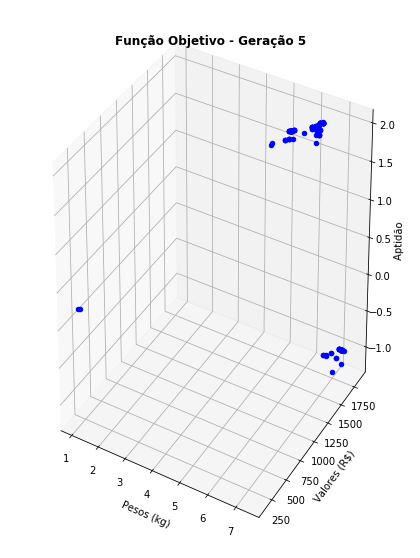

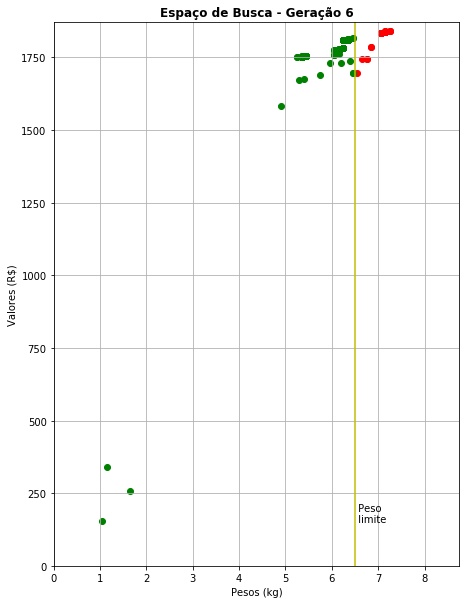

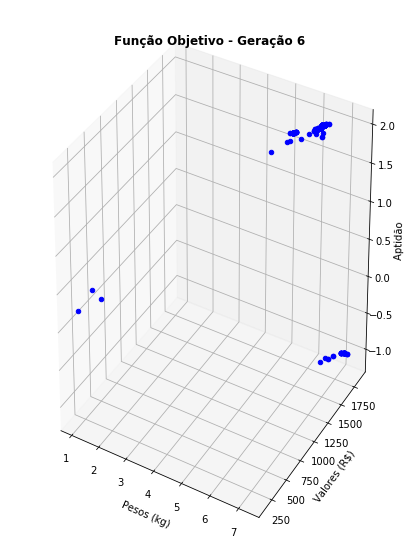

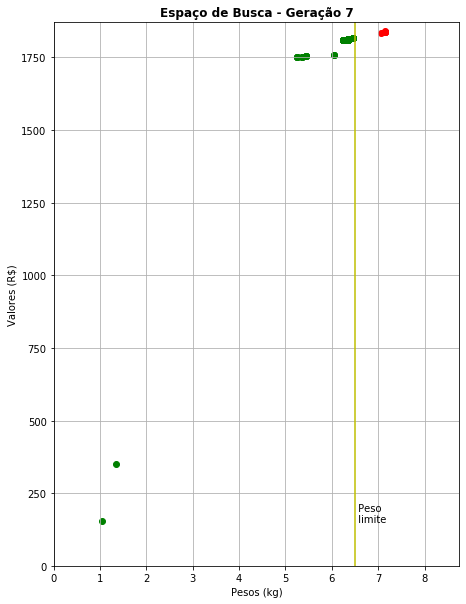

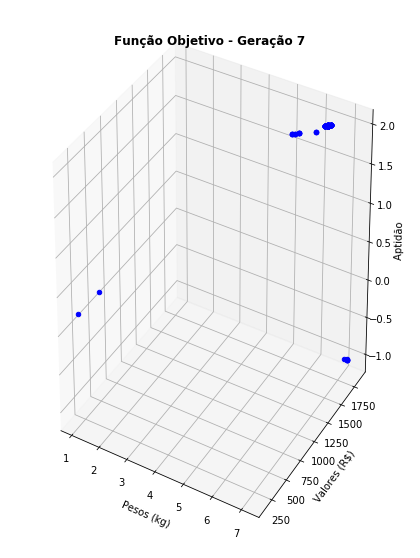

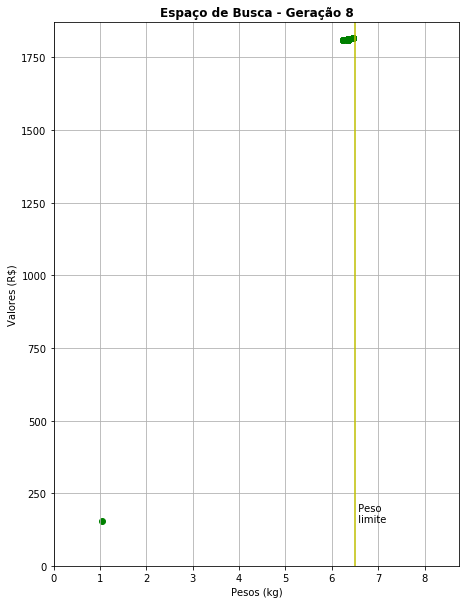

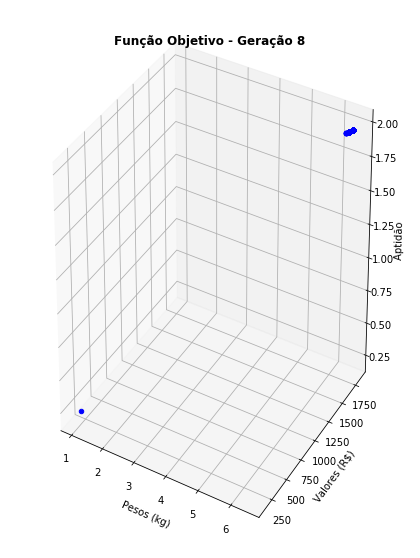

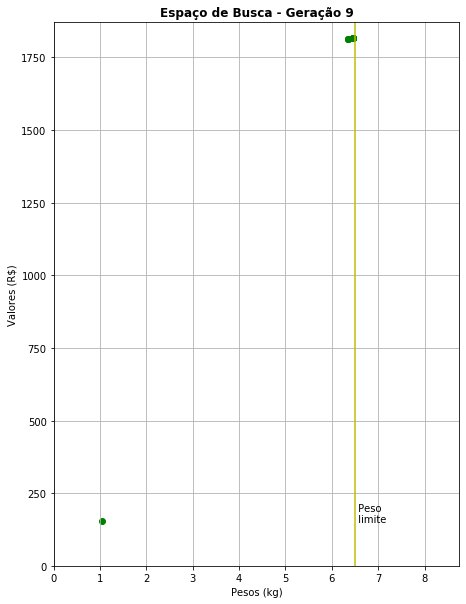

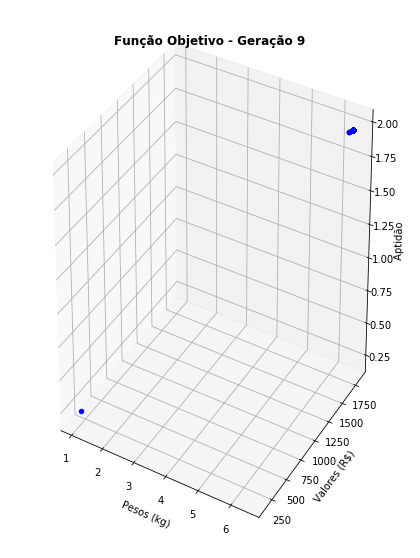

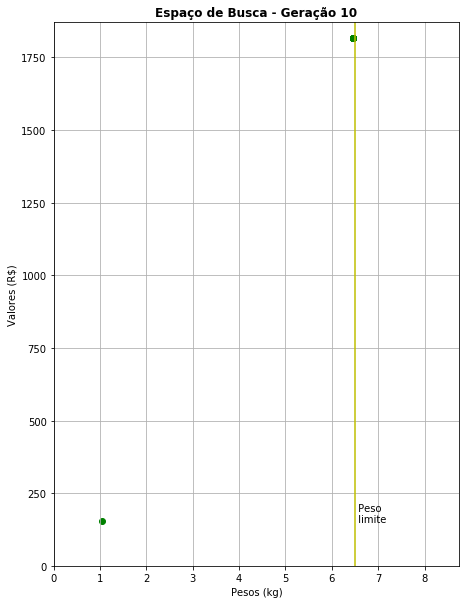

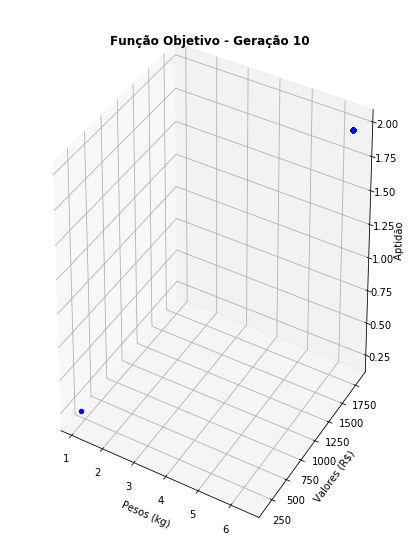

In [12]:
for geracao in range(1, n_geracoes+1):
    
    # 4 - AVALIAÇÃO DA APTIDÃO DA POPULAÇÃO ATUAL

    t = 'Espaço de Busca - Geração ' + str(geracao)
    valores_mochilas = calcula_valores_populacao(populacao, valores)
    pesos_mochilas = calcula_pesos_populacao(populacao, pesos)
    plot_espaco_busca(valores_mochilas, valor_max, pesos_mochilas, peso_limite, peso_max, t)
    
    t = 'Função Objetivo - Geração ' + str(geracao)
    aptidoes = funcao_objetivo(valores_mochilas, pesos_mochilas, valor_max, peso_limite)
    plot_funcao_objetivo(valores_mochilas, pesos_mochilas, aptidoes, peso_max, t)
    
    # 5 - RANKING DE APTIDÃO
    
    # Geração de uma lista das mochilas que compõe a geração atual, por ordem de aptidão (da maior para a menor).

    ranking = gera_ranking(aptidoes[:])
                
    # 6 - SELEÇÃO DOS PAIS

    pais = seleciona_pais(ranking)
    
    # 7 - CRUZAMENTO
    
    # O método utilizado será o de 'recombinação com um ponto de corte'.

    populacao = cruzamento(populacao, pais)
    
    # 8 - MUTAÇÃO
    
    # Consiste em mudar, aleatoriamente, alguma característica do indivíduo.
    # No caso, algumas mochilas (dentro da nova população) serão selecionadas. 
    # Cada uma delas terá UM objeto retirado ou adicionado.
    
    mutantes = seleciona_mutantes(populacao, prob_mutacao)    
    populacao = realiza_mutacao(populacao, mutantes, taxa_mutacao)        

# 9 - Melhor solução 

In [13]:
melhor_mochila = populacao[ranking[0]]
mochila_decodificada = decodifica_mochila(melhor_mochila, nomes, valores, pesos)
print('$ Melhor mochila $')
print('-> Itens: ')
print_lista(mochila_decodificada)

$ Melhor mochila $
-> Itens: 
Caneta
Mouse
Caderno
Carregador
Post-it
Livro
Notebook
Smartphone
Pen-drive
Calculadora
-------------------
Valor: R$ 1816.5
Peso: 6.45 kg


# Referências

[Wikipedia - Problema da Mochila](https://pt.wikipedia.org/wiki/Problema_da_mochila)